# Visualize UMAP for CP features

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# Set directory and file structure
umap_dir <- file.path("results")
plate3_name <- "localhost230405150001"
umap_file <- "UMAP_localhost230405150001_sc_norm_fs_cellprofiler.csv.gz.tsv.gz"
umap_path <- file.path(umap_dir, umap_file)


output_fig_dir <- file.path("figures")
umap_prefix <- "UMAP_"
plate_suffix <- "_sc_norm_fs_cellprofiler.csv.gz.tsv.gz"

# Define output figure paths

output_umap_file = file.path(output_fig_dir,
paste0(umap_prefix, plate3_name))
        
print(output_umap_file)

[1] "figures/UMAP_localhost230405150001"


In [3]:
# Load in the umap data
df <- readr::read_tsv(
    umap_path,
    col_types = readr::cols(
        .default = "d",
        "Metadata_WellRow" = "c",
        "Metadata_WellCol" = "c",
        "Metadata_heart_number" = "c",
        "Metadata_treatment" = "c",
        "Metadata_ImageNumber" = "c",
        "Metadata_cell_type" = "c",
        "Metadata_heart_failure_type" = "c",
        "Metadata_Plate" = "c",
        "Metadata_Well" = "c",
        "Metadata_Cytoplasm_Parent_Cells" = "c",
        "Metadata_Cytoplasm_Parent_Nuclei" = "c",
        "Metadata_Cells_Number_Object_Number" = "c",
        "Metadata_Nuclei_Number_Object_Number" = "c"
    )
)
cell_count_df <- df %>%
    dplyr::group_by(Metadata_Well) %>%
    dplyr::count()

umap_cp_df <- df %>%
    dplyr::left_join(cell_count_df, by = "Metadata_Well")

## Generate UMAPs

In [4]:
# Generating UMAPs 
output_file <- paste0(output_umap_file, "_treatment.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.5, alpha = 0.4) +  # Adjusted alpha value
  theme_bw() +
  scale_color_manual(name = "Treatment",
                     values = c("DMSO" = "#BA5A31", "drug_x" = "#69DC9E", "TGFRi" = "#DC69B4")) +
  facet_wrap(~ Metadata_cell_type) +
  guides(colour = guide_legend(override.aes = list(size = 4))) + 
  theme(aspect.ratio = 1)

ggsave(output_file, treatment_gg, dpi = 500, height = 10, width = 10)

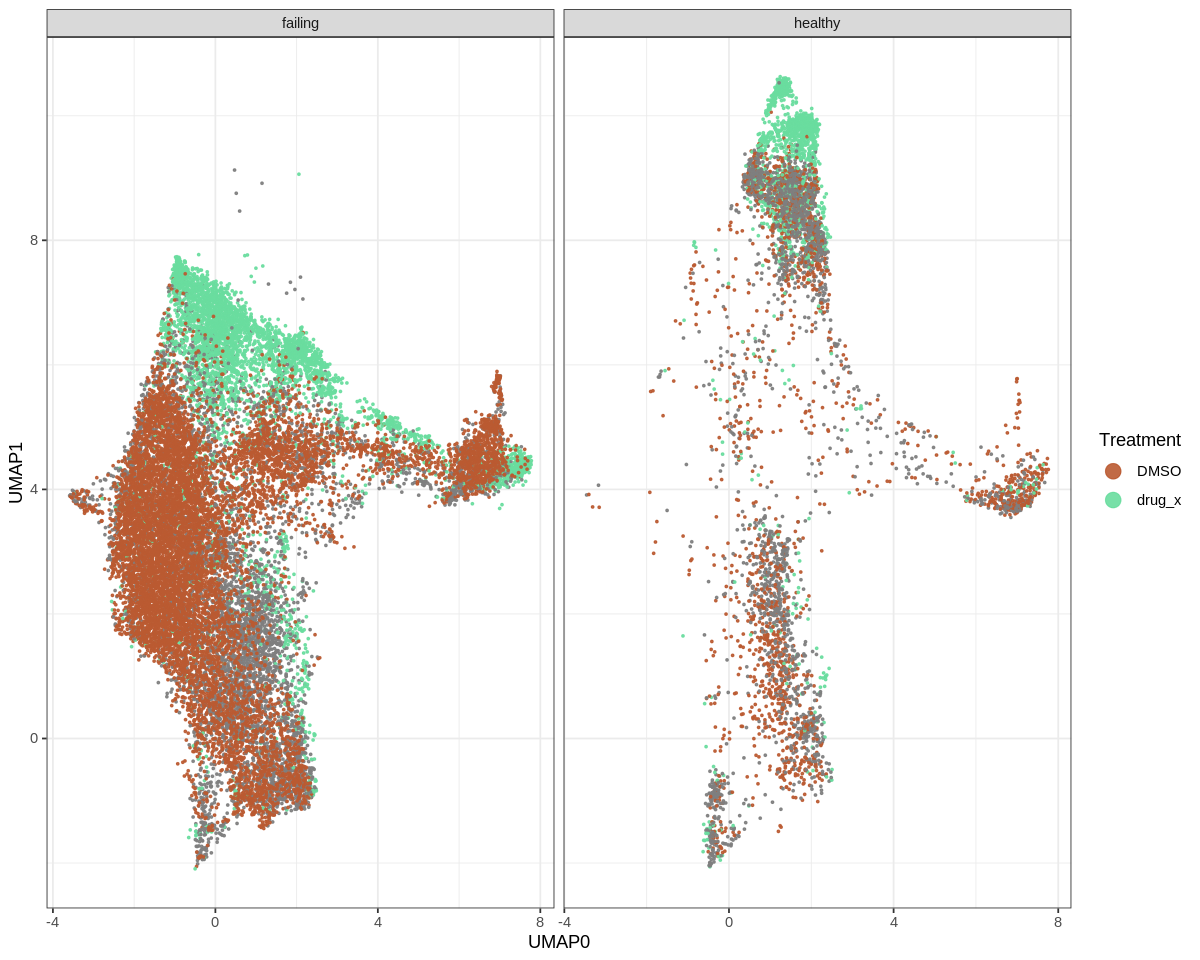

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)  # Adjust width and height as desired

output_file <- paste0(output_umap_file, "_treatment.png")

treatment_gg <- ggplot(umap_cp_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.4, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31", "drug_x" = "#69DC9E")
  ) +
  facet_grid(~ Metadata_cell_type, scales = "free") +
  guides(colour = guide_legend(override.aes = list(size = 4)))


print(treatment_gg)

In [6]:
# Extracting failing with drug X and Healthy with DMSo treatments
failing_drug_x_df <- umap_cp_df %>% filter(Metadata_cell_type=="failing" & Metadata_treatment=="drug_x")
healthy_DMSO_df <- umap_cp_df %>% filter(Metadata_cell_type=="healthy" & Metadata_treatment=="DMSO")

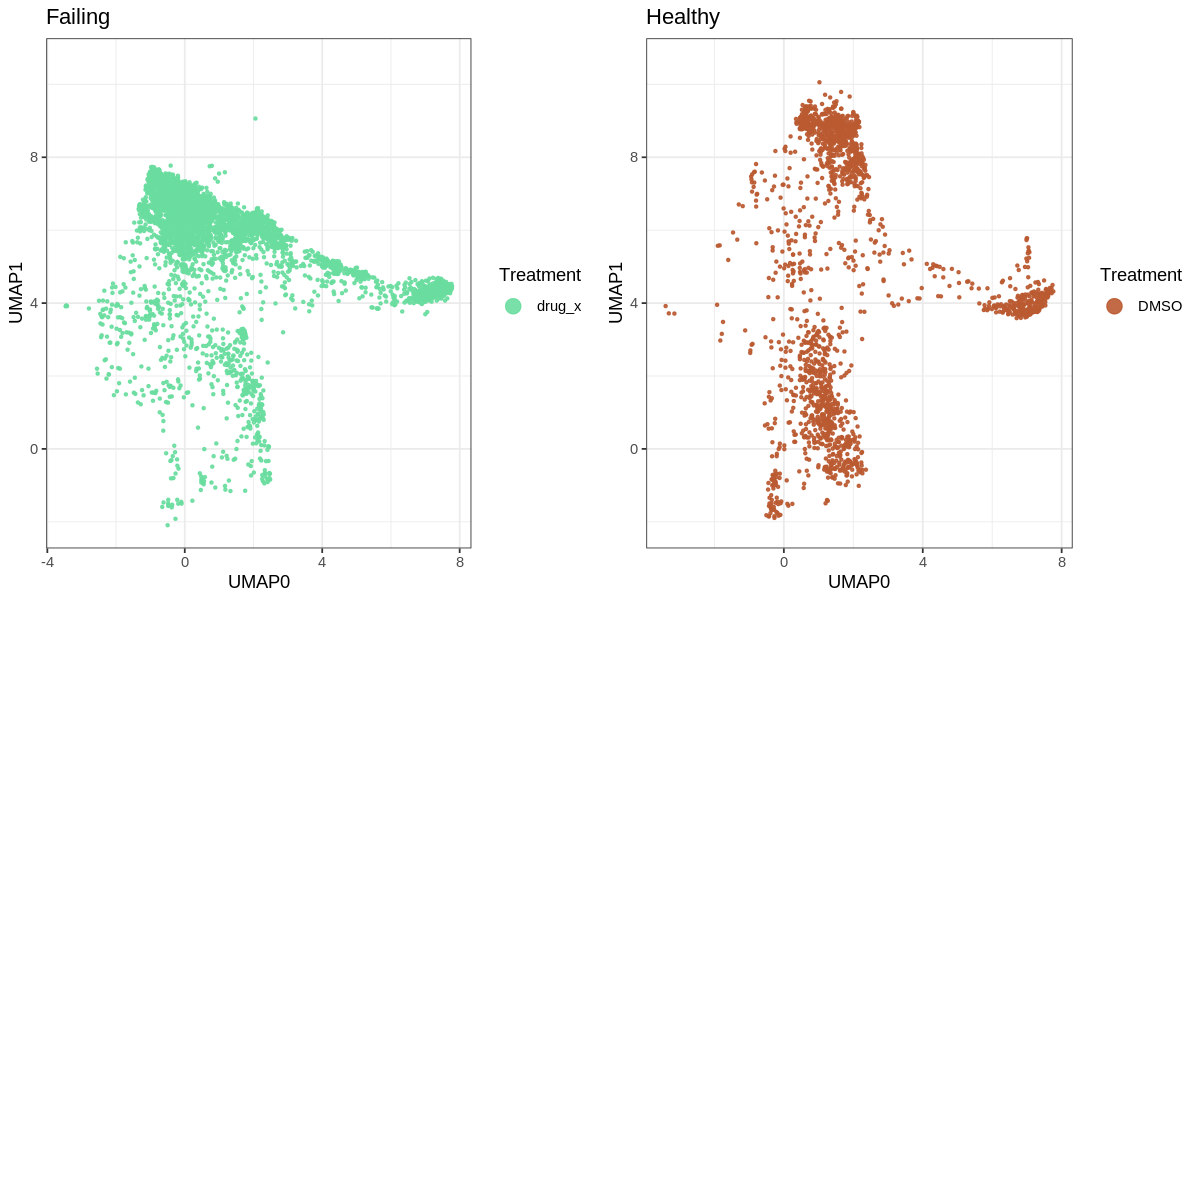

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)  # Adjust width and height as desired

output_file <- paste0(output_umap_file, "_treatment_health_vs_failing.png")

plot1 <- ggplot(failing_drug_x_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("drug_x" = "#69DC9E")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  labs(title = "Failing") +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

plot2 <- ggplot(healthy_DMSO_df, aes(x = UMAP0, y = UMAP1)) +
  geom_point(aes(color = Metadata_treatment), size = 0.6, alpha = 0.9) +
  theme_bw() +
  scale_color_manual(
    name = "Treatment",
    values = c("DMSO" = "#BA5A31")
  ) +
  guides(colour = guide_legend(override.aes = list(size = 4))) +
  labs(title = "Healthy") +
  ylim(min(umap_cp_df$UMAP1), max(umap_cp_df$UMAP1))  # Set the same y-axis limits as umap_cp_df

merged_plot <- grid.arrange(
  plot1, plot2, ncol = 2,
  widths = c(1, 1), heights = c(1, 1)
)


ggsave(output_file, merged_plot, dpi = 500, height = 10, width = 10)
